# imports


In [1]:
import os, glob
from functools import reduce
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

avg_cpu_load = '/avg_cpu_load'
avg_heap = '/avg_heap'
avg_memory = '/avg_memory'
avg_num_cores = '/avg_num_cores'
cpu_user_util = '/cpu_user_util'
max_cpu_load = '/max_cpu_load'
max_heap = '/max_heap'
p99_response_time = '/p99_response_time'
reco_rate = '/reco_rate'

paths = [[avg_cpu_load, 'avg_cpu_load'], [avg_heap, 'avg_heap'], [avg_memory, 'avg_memory']
    , [avg_num_cores, 'avg_num_cores'], [cpu_user_util, 'cpu_user_util'],
         [max_cpu_load, 'max_cpu_load'], [max_heap, 'max_heap']
    , [p99_response_time, 'p99_response_time'], [reco_rate, 'reco_rate']]

data_path = 'Data/Single servers/AM/'
cores_40_path = '40 cores 187.35 GB'
cores_40_path_copy = '40 cores 187.35 GB - Copy'
a4_dims = (11.7, 8.27)


In [2]:
def getCsv(data_path, core_path, metric_path, name_of_metric):
    all_files = glob.glob(os.path.join(data_path + core_path + metric_path, "*.csv"))
    all_csv = (pd.read_csv(f, sep=',') for f in all_files)
    new_csv = pd.concat(all_csv, ignore_index=True)
    new_csv.columns = ['dates', name_of_metric]
    return new_csv


In [3]:
csv_data_40_cores = [getCsv(data_path, cores_40_path, path[0], path[1]) for path in paths]
csv_data_40_cores = reduce(lambda left, right: pd.merge(left, right, on=['dates'],
                                                        how='outer'), csv_data_40_cores)

csv_data_40_cores = csv_data_40_cores.dropna()

In [ ]:
csv_data_40_cores.info()

# sacle - manual 

In [ ]:
csv_data_40_cores = csv_data_40_cores.drop('avg_num_cores', 1)
data_to_scale = csv_data_40_cores.drop('dates', 1)
normalized_df_all_dates=(data_to_scale-data_to_scale.min())/(data_to_scale.max()-data_to_scale.min())
normalized_df_all_dates = normalized_df_all_dates.merge(
    right=csv_data_40_cores['dates'],
    left_index=True,
    right_index=True,
    suffixes=['', '_norm'])
normalized_df_all_dates_graph = normalized_df_all_dates.melt('dates', var_name='all_data',  value_name='vals')

# heat_map

In [ ]:
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(normalized_df_all_dates.corr(), annot = True,cmap='coolwarm')

In [ ]:
csv_data_40_cores.hist(bins = 20, figsize = (20,20), color = 'r')

## all_metrics- PLOT - normalized

In [ ]:
sns.set(rc={'figure.figsize': (30, 18.27)})
g = sns.lineplot(x="dates", y="vals", hue='all_data', data=normalized_df_all_dates_graph)
g.xaxis.set_major_locator(MultipleLocator(200))
plt.xlim(0)


a

In [4]:
a

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48136 entries, 0 to 48211
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dates              48136 non-null  object 
 1   avg_cpu_load       48136 non-null  float64
 2   avg_heap           48136 non-null  float64
 3   avg_memory         48136 non-null  float64
 4   avg_num_cores      48136 non-null  float64
 5   cpu_user_util      48136 non-null  float64
 6   max_cpu_load       48136 non-null  float64
 7   max_heap           48136 non-null  float64
 8   p99_response_time  48136 non-null  float64
 9   reco_rate          48136 non-null  float64
dtypes: float64(9), object(1)
memory usage: 4.0+ MB


# sacle - manual 

In [7]:
csv_data_40_cores = csv_data_40_cores.drop('avg_num_cores', 1)
data_to_scale = csv_data_40_cores.drop('dates', 1)
normalized_df_all_dates=(data_to_scale-data_to_scale.min())/(data_to_scale.max()-data_to_scale.min())
normalized_df_all_dates = normalized_df_all_dates.merge(
    right=csv_data_40_cores['dates'],
    left_index=True,
    right_index=True,
    suffixes=['', '_norm'])
normalized_df_all_dates_graph = normalized_df_all_dates.melt('dates', var_name='all_data',  value_name='vals')

# heat_map

<AxesSubplot:>

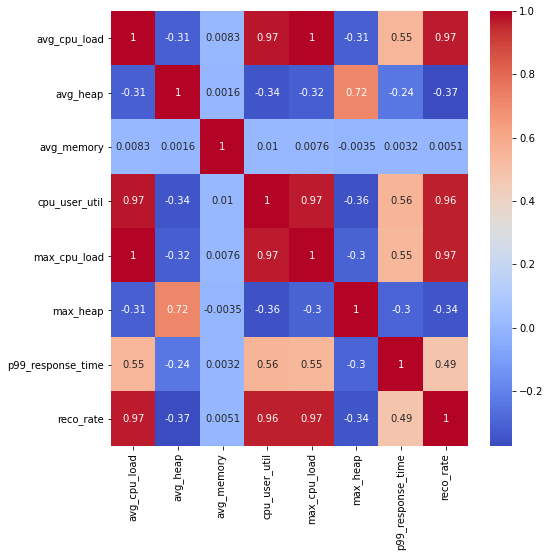

In [8]:
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(normalized_df_all_dates.corr(), annot = True,cmap='coolwarm')

array([[<AxesSubplot:title={'center':'avg_cpu_load'}>,
        <AxesSubplot:title={'center':'avg_heap'}>,
        <AxesSubplot:title={'center':'avg_memory'}>],
       [<AxesSubplot:title={'center':'cpu_user_util'}>,
        <AxesSubplot:title={'center':'max_cpu_load'}>,
        <AxesSubplot:title={'center':'max_heap'}>],
       [<AxesSubplot:title={'center':'p99_response_time'}>,
        <AxesSubplot:title={'center':'reco_rate'}>, <AxesSubplot:>]],
      dtype=object)

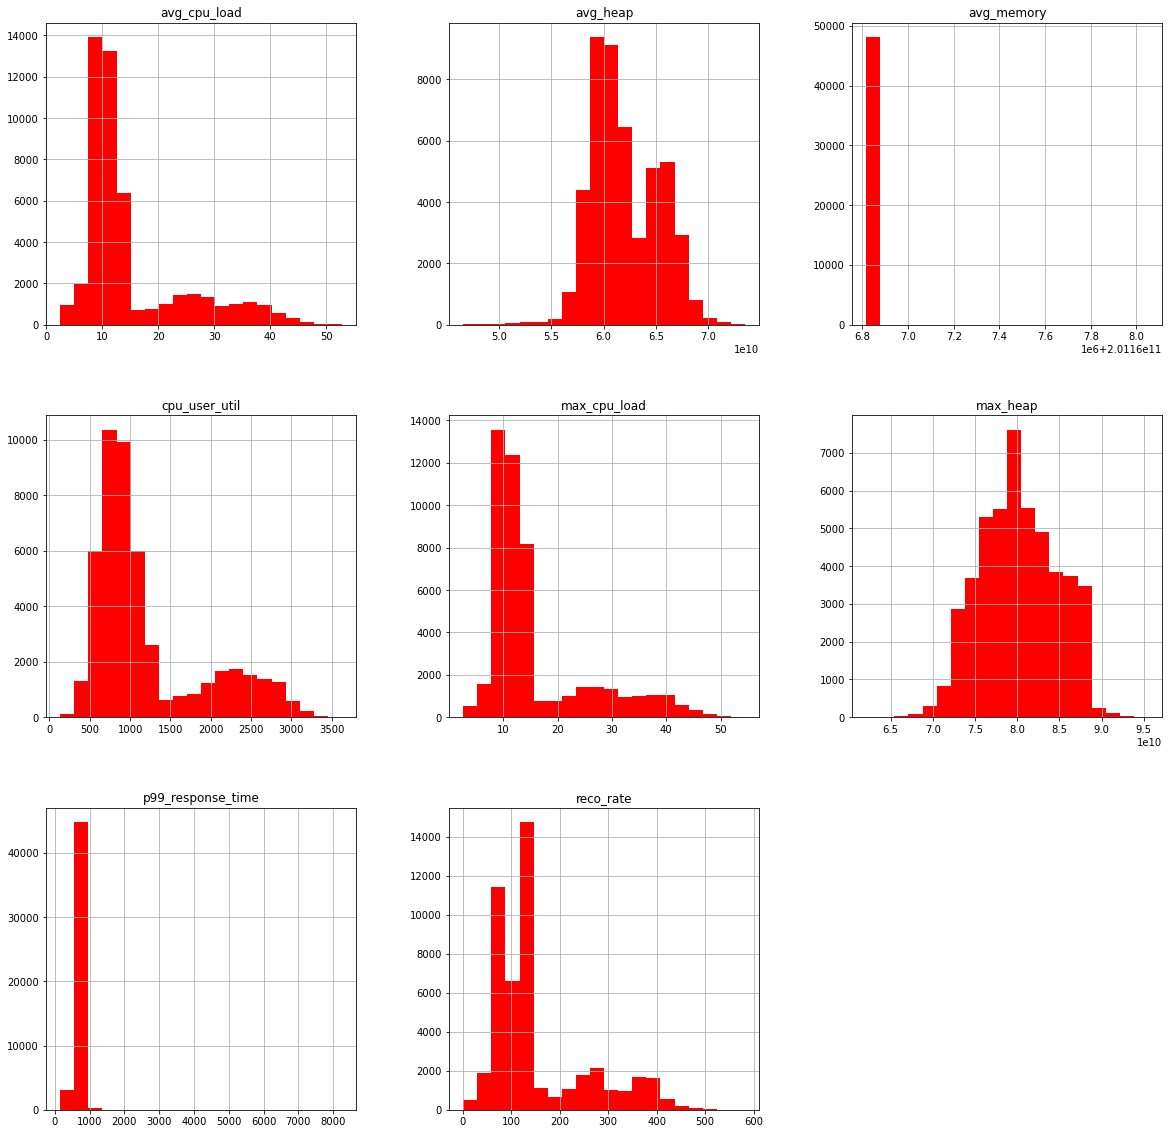

In [9]:
csv_data_40_cores.hist(bins = 20, figsize = (20,20), color = 'r')

## all_metrics- PLOT - normalized

(0.0, 18347.7)

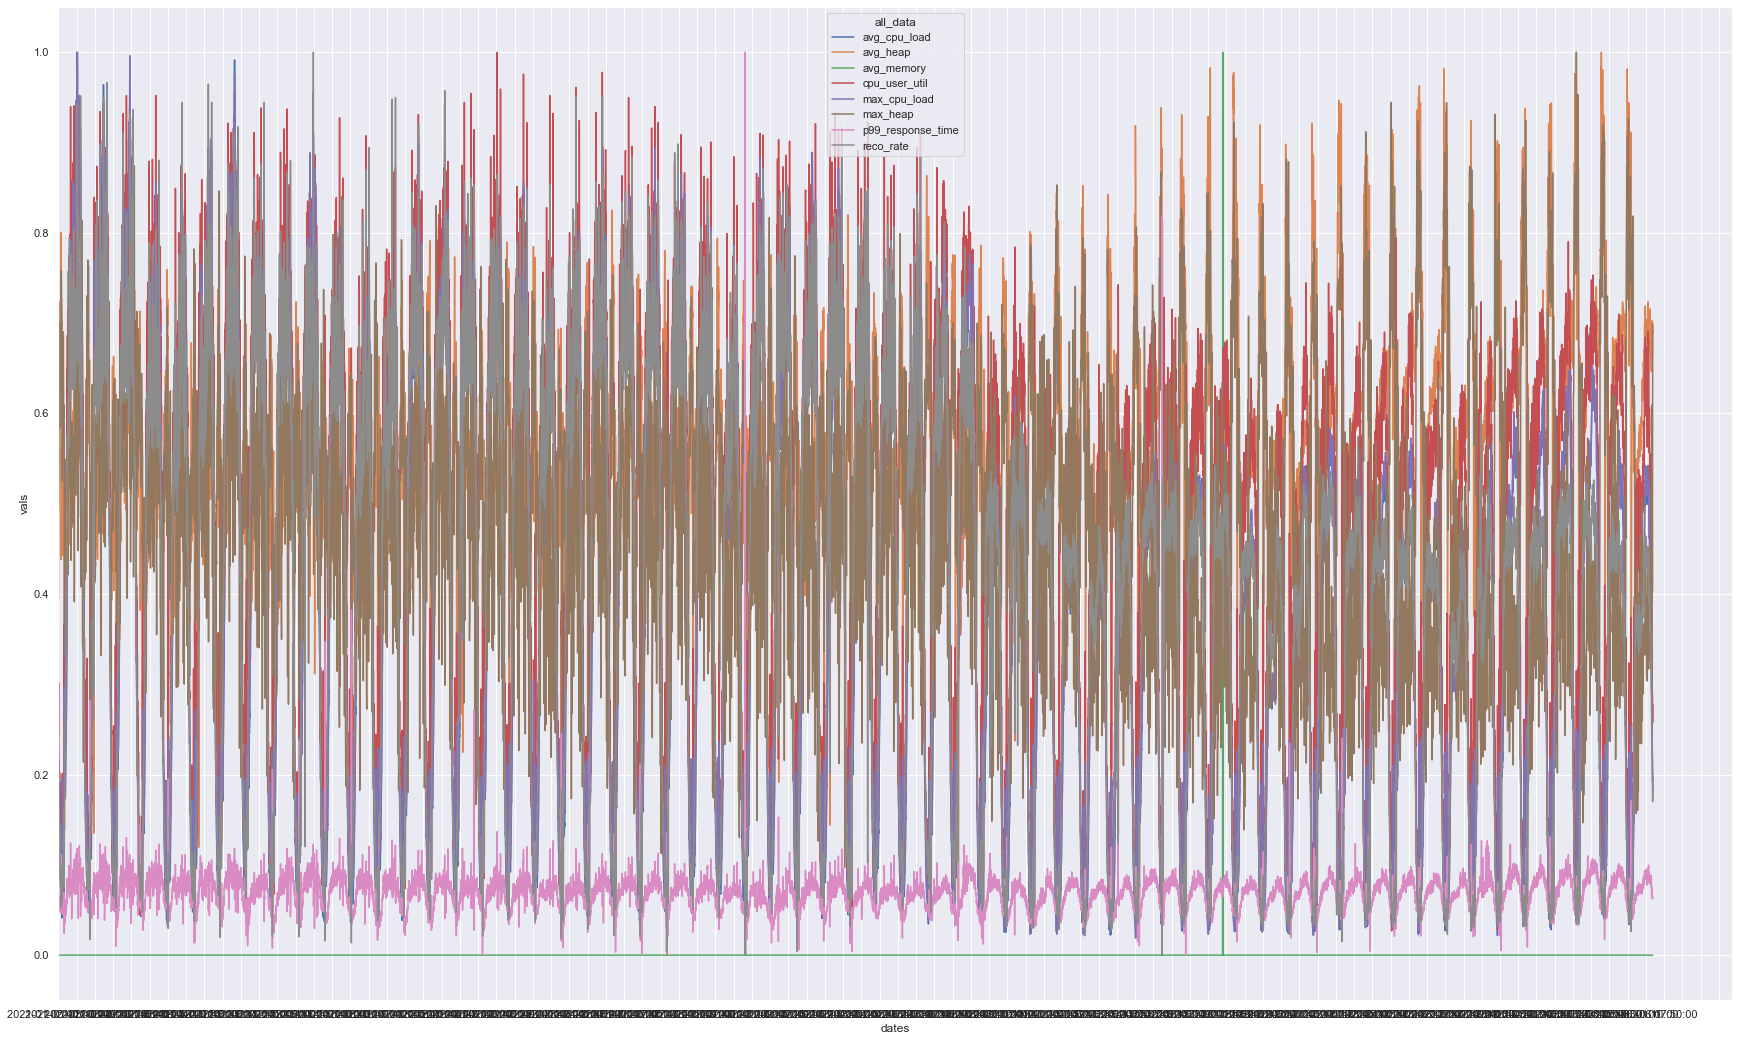

In [10]:
sns.set(rc={'figure.figsize': (30, 18.27)})
g = sns.lineplot(x="dates", y="vals", hue='all_data', data=normalized_df_all_dates_graph)
g.xaxis.set_major_locator(MultipleLocator(200))
plt.xlim(0)


a